#  Find the scale incoming U for all runs

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns

# remove these when canyon records is turned into package or something like that:
import os
import sys

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/PythonScripts/Paper1Figures/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import canyon_records 
records = canyon_records.main()

for rec in records:
    print(rec.name)

CNTDIFF_run38
CNTDIFF_run37
CNTDIFF_run36
CNTDIFF_run45
CNTDIFF_run73
CNTDIFF_run75
CNTDIFF_run79
CNTDIFF_run67
CNTDIFF_run51
CNTDIFF_run69
CNTDIFF_run71
3DVISC_run01
3DVISC_run02
3DVISC_run04
3DVISC_run03
3DVISC_run05
3DVISC_run06
LOWER_BF_run01
LOW_BF_run01
LOWEST_BF_run01
LOWEST_BF_run03
LOWEST_BF_run05
LOWEST_BF_run07
LOWEST_BF_run11
3DVISC_REALISTIC_run01
3DVISC_REALISTIC_run02
3DVISC_REALISTIC_run03
3DVISC_REALISTIC_run05
3DVISC_REALISTIC_run06
3DVISC_REALISTIC_run07
3DVISC_REALISTIC_run08
3DVISC_REALISTIC_run09
3DVISC_REALISTIC_run10
3DVISC_REALISTIC_run11
3DVISC_REALISTIC_run12
3DVISC_REALISTIC_run13
3DVISC_REALISTIC_run14
3DVISC_REALISTIC_run15
3DVISC_REALISTIC_run16
3DVISC_REALISTIC_run17
3DVISC_REALISTIC_run18
3DVISC_REALISTIC_run19
3DVISC_REALISTIC_run20
3DVISC_REALISTIC_run21
3DVISC_REALISTIC_run22
3DVISC_REALISTIC_run23
3DVISC_REALISTIC_run24
3DVISC_REALISTIC_run25
3DVISC_REALISTIC_run26
3DVISC_REALISTIC_run27
3DVISC_REALISTIC_run28
CNTDIFF_run81
LONGER_CNY_run01
LONGER_C

In [3]:
filegrid = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 

with Dataset(filegrid, 'r') as nbl:
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    RC = nbl.variables['RC'][:]
    HFacW = nbl.variables['HFacW'][:,:,:]
    depth = nbl.variables['Depth'][:,:]

hfac = np.ma.masked_values(HFacW.data, 0)
maskU = np.ma.getmask(hfac)

filegrid2 = '/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/gridGlob.nc' 
with Dataset(filegrid2, 'r') as nbl:
    depth2 = nbl.variables['Depth'][:,:]

filegrid3 = '/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc' 
with Dataset(filegrid3, 'r') as nbl:
    depth3 = nbl.variables['Depth'][:,:]


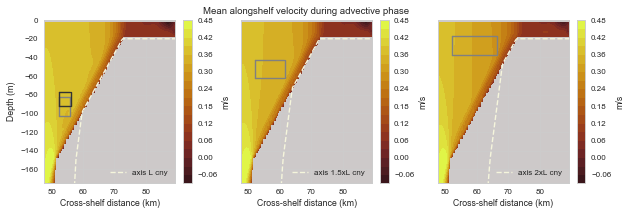

In [6]:
sns.set_context('paper')
sns.set_style('whitegrid')

fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(10,3), sharey = True)
ax0.set_facecolor((205/255.0, 201/255.0, 201/255.0))
ax1.set_facecolor((205/255.0, 201/255.0, 201/255.0))
ax2.set_facecolor((205/255.0, 201/255.0, 201/255.0))

filestate = ('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' )
filestate2 = ('/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/stateGlob.nc' )
filestate3 = ('/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc' )

xind = 100

with Dataset(filestate, 'r') as nbl:
    u_CS0 = nbl.variables['U'][8:18,:35,200:359,xind]
        
with Dataset(filestate2, 'r') as nbl:
    u_CS1 = nbl.variables['U'][8:18,:35,200:359,xind]

with Dataset(filestate3, 'r') as nbl:
    u_CS2 = nbl.variables['U'][8:18,:35,200:359,xind]

# Incoming velocity cmaps
CF = ax0.contourf(Y[200:359]/1000,RC[:35],np.ma.masked_array(np.mean(u_CS0,axis=0), mask=maskU[0:35,200:359,xind]),
                  20,cmap = cmo.cm.solar)
CB = plt.colorbar(CF,ax=ax0)
CB.set_label('m/s')
ax0.plot(Y[200:359]/1000, -depth[200:359, 180], '--', color='beige', label='axis L cny')

CF = ax1.contourf(Y[200:359]/1000,RC[:35],np.ma.masked_array(np.mean(u_CS1,axis=0), mask=maskU[0:35,200:359,xind]),
                  20,cmap = cmo.cm.solar)
CB = plt.colorbar(CF,ax=ax1)
CB.set_label('m/s')
ax1.plot(Y[200:359]/1000, -depth2[200:359, 180], '--', color='beige', label='axis 1.5xL cny')

CF = ax2.contourf(Y[200:359]/1000,RC[:35],np.ma.masked_array(np.mean(u_CS2,axis=0), mask=maskU[0:35,200:359,xind]),
                  20,cmap = cmo.cm.solar)
CB = plt.colorbar(CF,ax=ax2)
CB.set_label('m/s')
ax2.plot(Y[200:359]/1000, -depth3[200:359, 180], '--', color='beige', label='axis 2xL cny')

# my U box
ax0.plot(Y[230:251]/1000,(RC[20])*np.ones(np.shape(Y[230:251])),color='0.5')
ax0.plot(Y[230:251]/1000,(RC[16])*np.ones(np.shape(Y[230:251])),color='0.5')
ax0.plot(((Y[230]/1000))*np.ones(np.shape(RC[16:21])),RC[16:21],color='0.5')
ax0.plot(((Y[250]/1000))*np.ones(np.shape(RC[16:21])),RC[16:21],color='0.5')

ax1.plot(Y[230:276]/1000,(RC[12])*np.ones(np.shape(Y[230:276])),color='0.5')
ax1.plot(Y[230:276]/1000,(RC[8])*np.ones(np.shape(Y[230:276])),color='0.5')
ax1.plot(((Y[230]/1000))*np.ones(np.shape(RC[8:13])),RC[8:13],color='0.5')
ax1.plot(((Y[276]/1000))*np.ones(np.shape(RC[8:13])),RC[8:13],color='0.5')

        
ax2.plot(Y[230:295]/1000,(RC[3])*np.ones(np.shape(Y[230:295])),color='0.5')
ax2.plot(Y[230:295]/1000,(RC[7])*np.ones(np.shape(Y[230:295])),color='0.5')
ax2.plot(((Y[230]/1000))*np.ones(np.shape(RC[3:8])),RC[3:8],color='0.5')
ax2.plot(((Y[295]/1000))*np.ones(np.shape(RC[3:8])),RC[3:8],color='0.5')


# approx location of H&A2013's profiles
ax0.plot(Y[230:251]/1000,(RC[18])*np.ones(np.shape(Y[230:251])),color='0.2')
ax0.plot(Y[230:251]/1000,(RC[15])*np.ones(np.shape(Y[230:251])),color='0.2')
ax0.plot(((Y[230]/1000))*np.ones(np.shape(RC[15:19])),RC[15:19],color='0.2')
ax0.plot(((Y[251]/1000))*np.ones(np.shape(RC[15:19])),RC[15:19],color='0.2')

ax0.set_ylabel('Depth (m)')
ax0.set_xlabel('Cross-shelf distance (km)')
ax1.set_xlabel('Cross-shelf distance (km)')
ax2.set_xlabel('Cross-shelf distance (km)')

ax1.set_title('Mean alongshelf velocity during advective phase')
ax0.legend(loc=4)    
ax1.legend(loc=4)    
ax2.legend(loc=4)    

ax0.set_ylim(-175,0)
plt.savefig('U_incoming_Ls.eps', format='eps',bbox_inches='tight')

In [5]:
xind = 100

with Dataset(filestate, 'r') as nbl:
    mean_short = np.mean(nbl.variables['U'][8:18,16:21,230:251,xind])
        
with Dataset(filestate2, 'r') as nbl:
    mean_long = np.mean(nbl.variables['U'][8:18,8:13,230:276,xind])

with Dataset(filestate3, 'r') as nbl:
    mean_longest = np.mean(nbl.variables['U'][8:18,3:8,230:295,xind])

print(mean_short, mean_long, mean_longest)


0.3661 0.353069 0.328481


In [6]:
print(u_CS0[8:18,16:21,230:251])

[]


The black box is where HA 2013 put their profiles and the grey box is my U box.

LONGER_CNY_LOWER_U_run03 : 0.268 $\pm$ 0.012 ms$^-1$ , /data/kramosmu/results/TracerExperiments/LONGER_CNY_LOWER_U/run03/stateGlob.nc
LONGER_CNY_LOWER_U_run04 : 0.229 $\pm$ 0.010 ms$^-1$ , /data/kramosmu/results/TracerExperiments/LONGER_CNY_LOWER_U/run04/stateGlob.nc
LONGER_CNY_LOWER_U_run05 : 0.220 $\pm$ 0.009 ms$^-1$ , /data/kramosmu/results/TracerExperiments/LONGER_CNY_LOWER_U/run05/stateGlob.nc
NARROW_CNY_run01 : 0.365 $\pm$ 0.012 ms$^-1$ , /data/kramosmu/results/TracerExperiments/NARROW_CNY/run01/stateGlob.nc


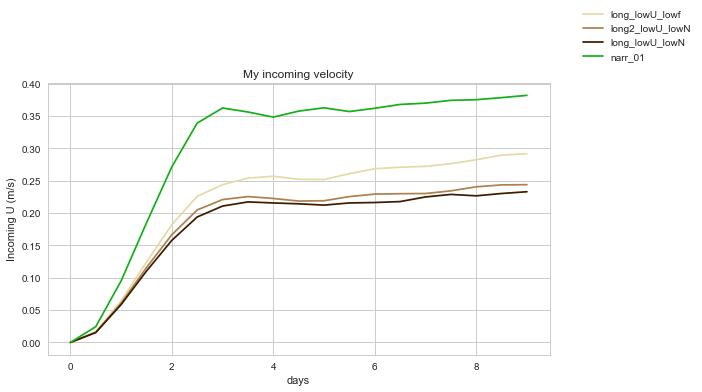

In [7]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

for rec in records[-4:]:
    filestate = ('/data/kramosmu/results/TracerExperiments/%s/%s/stateGlob.nc' 
                 %(rec.exp_code,rec.run_num))
   
    with Dataset(filestate, 'r') as nbl:
        u_ts = nbl.variables['U'][:,16:21,230:251,110]
        u_mean = np.mean(nbl.variables['U'][8:18,16:21,230:251,110])
        u_std = np.std(nbl.variables['U'][8:18,16:21,230:251,110])
    
    rec.u_model = u_mean
    
    ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color=sns.xkcd_rgb[rec.color2],
            label=rec.label2)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$ , %s' % (rec.name, u_mean, u_std, filestate))

ax.set_title('My incoming velocity')
ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(bbox_to_anchor=(1.3,1.3))    

In [6]:
for rec in records:
     print('%0.3f ,' % rec.u_model)


0.365 ,
0.362 ,
0.320 ,
0.379 ,
0.397 ,
0.346 ,
0.354 ,
0.361 ,
0.392 ,
0.379 ,
0.414 ,
0.356 ,
0.361 ,
0.360 ,
0.356 ,
0.349 ,
0.351 ,
0.313 ,
0.258 ,
0.141 ,
0.134 ,
0.151 ,
0.155 ,
0.118 ,
0.342 ,
0.357 ,
0.356 ,
0.353 ,
0.353 ,
0.347 ,
0.341 ,
0.339 ,
0.338 ,
0.345 ,
0.338 ,
0.337 ,
0.355 ,
0.354 ,
0.356 ,
0.349 ,
0.351 ,
0.356 ,
0.356 ,
0.346 ,
0.346 ,
0.349 ,
0.352 ,
0.351 ,
0.358 ,
0.351 ,
0.351 ,
0.348 ,
0.344 ,
0.129 ,
0.354 ,
0.246 ,
0.238 ,
0.262 ,


CNTDIFF_run38 : 0.370 $\pm$ 0.080 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc
CNTDIFF_run37 : 0.367 $\pm$ 0.080 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run37/stateGlob.nc
CNTDIFF_run36 : 0.325 $\pm$ 0.071 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run36/stateGlob.nc
CNTDIFF_run45 : 0.387 $\pm$ 0.084 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run45/stateGlob.nc
CNTDIFF_run73 : 0.405 $\pm$ 0.089 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run73/stateGlob.nc
CNTDIFF_run75 : 0.348 $\pm$ 0.076 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run75/stateGlob.nc
CNTDIFF_run79 : 0.357 $\pm$ 0.078 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run79/stateGlob.nc
CNTDIFF_run67 : 0.366 $\pm$ 0.079 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run67/stateGlob.nc
CNTDIFF_run51 : 0.398 $\pm$ 0.088 ms$^-1$, /data/kramosmu/results/TracerExperiments/CNTDIFF/run51/stateGlob.nc
C

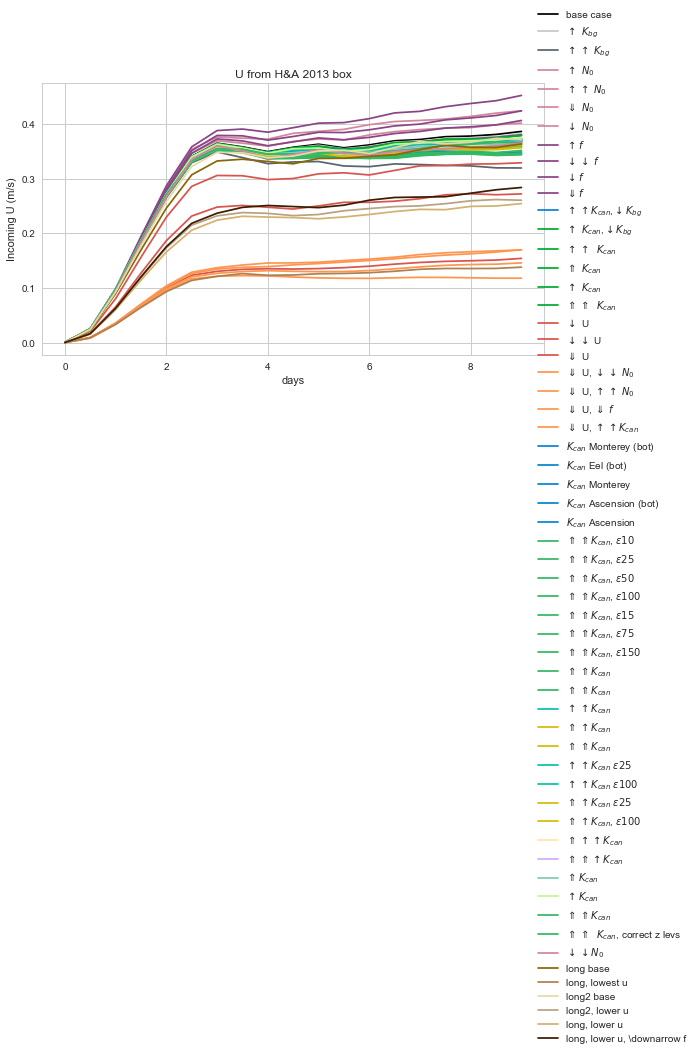

In [7]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

for rec in records:
    filestate = ('/data/kramosmu/results/TracerExperiments/%s/%s/stateGlob.nc' 
                 %(rec.exp_code,rec.run_num))
   
    with Dataset(filestate, 'r') as nbl:
        u_ts = nbl.variables['U'][:,15:19,230:251,110]
        u_mean = np.mean(nbl.variables['U'][12:16,15:19,230:251,110])
        u_std = np.std(nbl.variables['U'][2:16,15:19,230:251,110])
    rec.u_HA2013 = u_mean   
    ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color=sns.xkcd_rgb[rec.color2],
            label=rec.label2)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$, %s' % (rec.name, u_mean, u_std, filestate))
 

ax.set_title('U from H&A 2013 box')
ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')

ax.legend(bbox_to_anchor=(1.3,1.3))    

Text(0,0.5,'U_HA')

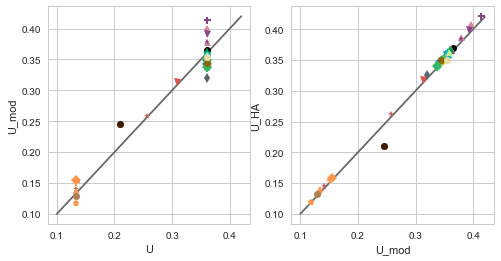

In [8]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(np.linspace(0.1,0.42,20),np.linspace(0.1,0.42,20),'-',color='0.4')
ax[1].plot(np.linspace(0.1,0.42,20),np.linspace(0.1,0.42,20),'-',color='0.4')

for rec in records:
    ax[0].plot(rec.u,rec.u_mod,marker=rec.mstyle,
               color=sns.xkcd_rgb[rec.color2], label=rec.label2)
    ax[1].plot(rec.u_mod,rec.u_ha,marker=rec.mstyle,
               color=sns.xkcd_rgb[rec.color2], label=rec.label2)
ax[0].set_xlabel('U')
ax[1].set_xlabel('U_mod')
ax[0].set_ylabel('U_mod')
ax[1].set_ylabel('U_HA')


OSError: No such file or directory

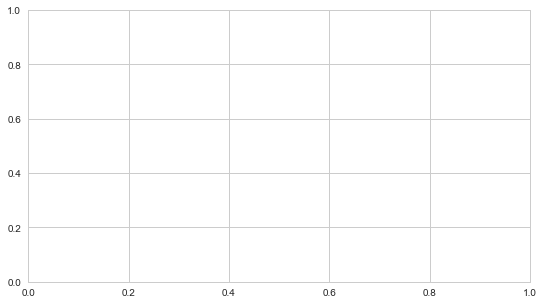

In [9]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)


filestate1 = ('/data/kramosmu/results/TracerExperiments/BARKLEY/run01/stateGlob.nc') 
filestate2 = ('/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/run01/stateGlob.nc') 
                
with Dataset(filestate1, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,21),np.mean(np.mean(u_ts,axis=1),axis=1),color='green',label="Barkley")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Barkley', u_mean, u_std))

with Dataset(filestate2, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color='blue',label="Parabolic")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Parabolic', u_mean, u_std))

ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)    